In [46]:
import os
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [9]:
def colorFader(mix=0):
    c1 = numpy.array(mpl.colors.to_rgb('blue'))
    c2 = numpy.array(mpl.colors.to_rgb('red'))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

In [43]:
spins = 64
P_plus_sample = 0.0
field_start = 0
field_stop = 5
field_steps = 1000

In [11]:
dos_dir = "C:/Construct/DOS/dos" + str(spins) + "/"
H = numpy.linspace(field_start, field_stop, field_steps)
P_plus = numpy.array([])
J_sum = numpy.array([])
file_count = 0
max_gem_size = 0
arr_of_files = numpy.array([])
for file in os.listdir(dos_dir):
    file = dos_dir + file
    arr_of_files = numpy.append(arr_of_files, file)
    N = int(open(file).readlines()[0].rstrip())
    J_sum = numpy.append(J_sum, int(open(file).readlines()[2].rstrip()))
    P_plus = numpy.append(P_plus, (2 * N * (N - 1) + J_sum[file_count]) / (4 * N * (N - 1)))
    file_count += 1
idx = P_plus.argsort()
J_sum = J_sum[idx]
P_plus = P_plus[idx]
arr_of_files = arr_of_files[idx]


P =  0.65 Stairs =  9


<Figure size 1920x1440 with 0 Axes>

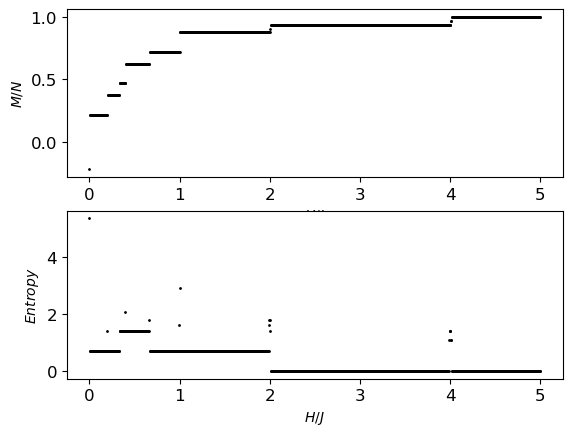

In [12]:
plt.figure(dpi=300)
sample_idx = int(file_count * P_plus_sample)
file = arr_of_files[sample_idx]
gem = numpy.loadtxt(open(file), skiprows=4).T
G = gem[0]
E = gem[1]
M = gem[2]
fig, (ax1, ax2) = plt.subplots(2)
M_before = - N * N
stair = 0
start = False
for h in range(len(H)):
    Energy = E - M * H[h]
    Egs_idx = numpy.argwhere(Energy <= numpy.min(Energy) * 0.9999)
    Mgs = numpy.min(M[Egs_idx]) / (N * N)
    if Mgs != M_before:
        start = True
    if start and Mgs == M_before:
        stair += 1
        start = False
    M_before = Mgs
    #Mgs = numpy.log(numpy.min(M[Egs_idx]) / (N * N))
    entropy = numpy.log(numpy.sum(G[Egs_idx]))
    ax1.scatter(H[h], Mgs, color='black', s=1)
    ax1.set(xlabel="$H / J$", ylabel="$M / N$")
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.grid(axis='x')
    ax2.scatter(H[h], entropy, color='black', s=1)
    ax2.set(xlabel="$H / J$", ylabel="$Entropy$")
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid(axis='x')
print("P = ", P_plus_sample, "Stairs = ", stair)
plt.show()
#plt.savefig("../../ferfase.eps", dpi=300)

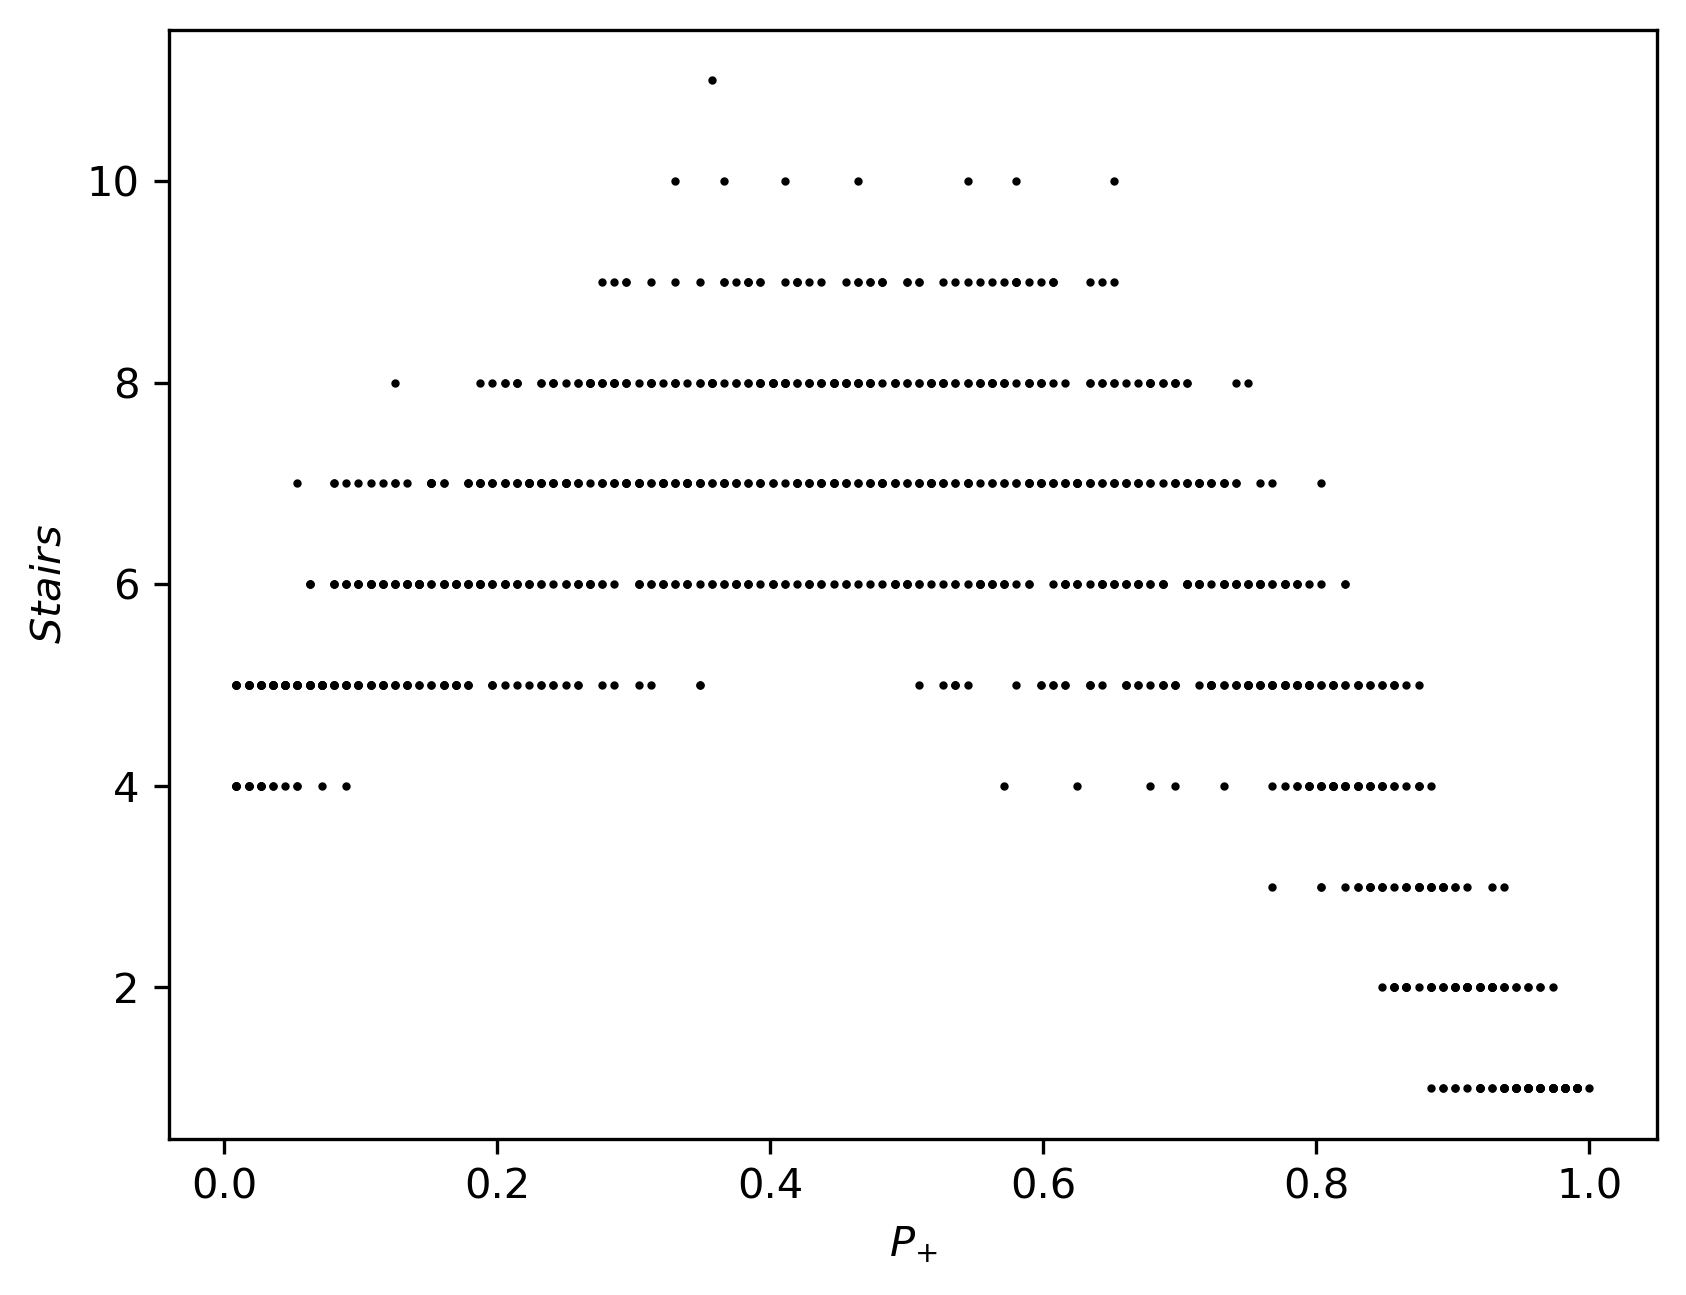

In [45]:
plt.figure(dpi=300)
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = numpy.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    M_before = - N * N
    stair = 0
    start = False
    for h in range(len(H)):
        Energy = E - M * H[h]
        Egs_idx = numpy.argwhere(Energy <= numpy.min(Energy) * 0.9999)
        Mgs = numpy.min(M[Egs_idx]) / (N * N)
        if Mgs != M_before:
            start = True
        if start and Mgs == M_before:
            stair += 1
            start = False
        M_before = Mgs
    plt.scatter(P_plus[indx], stair, color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("$Stairs$")
plt.show()
#plt.savefig("../../ferfase.eps", dpi=300)

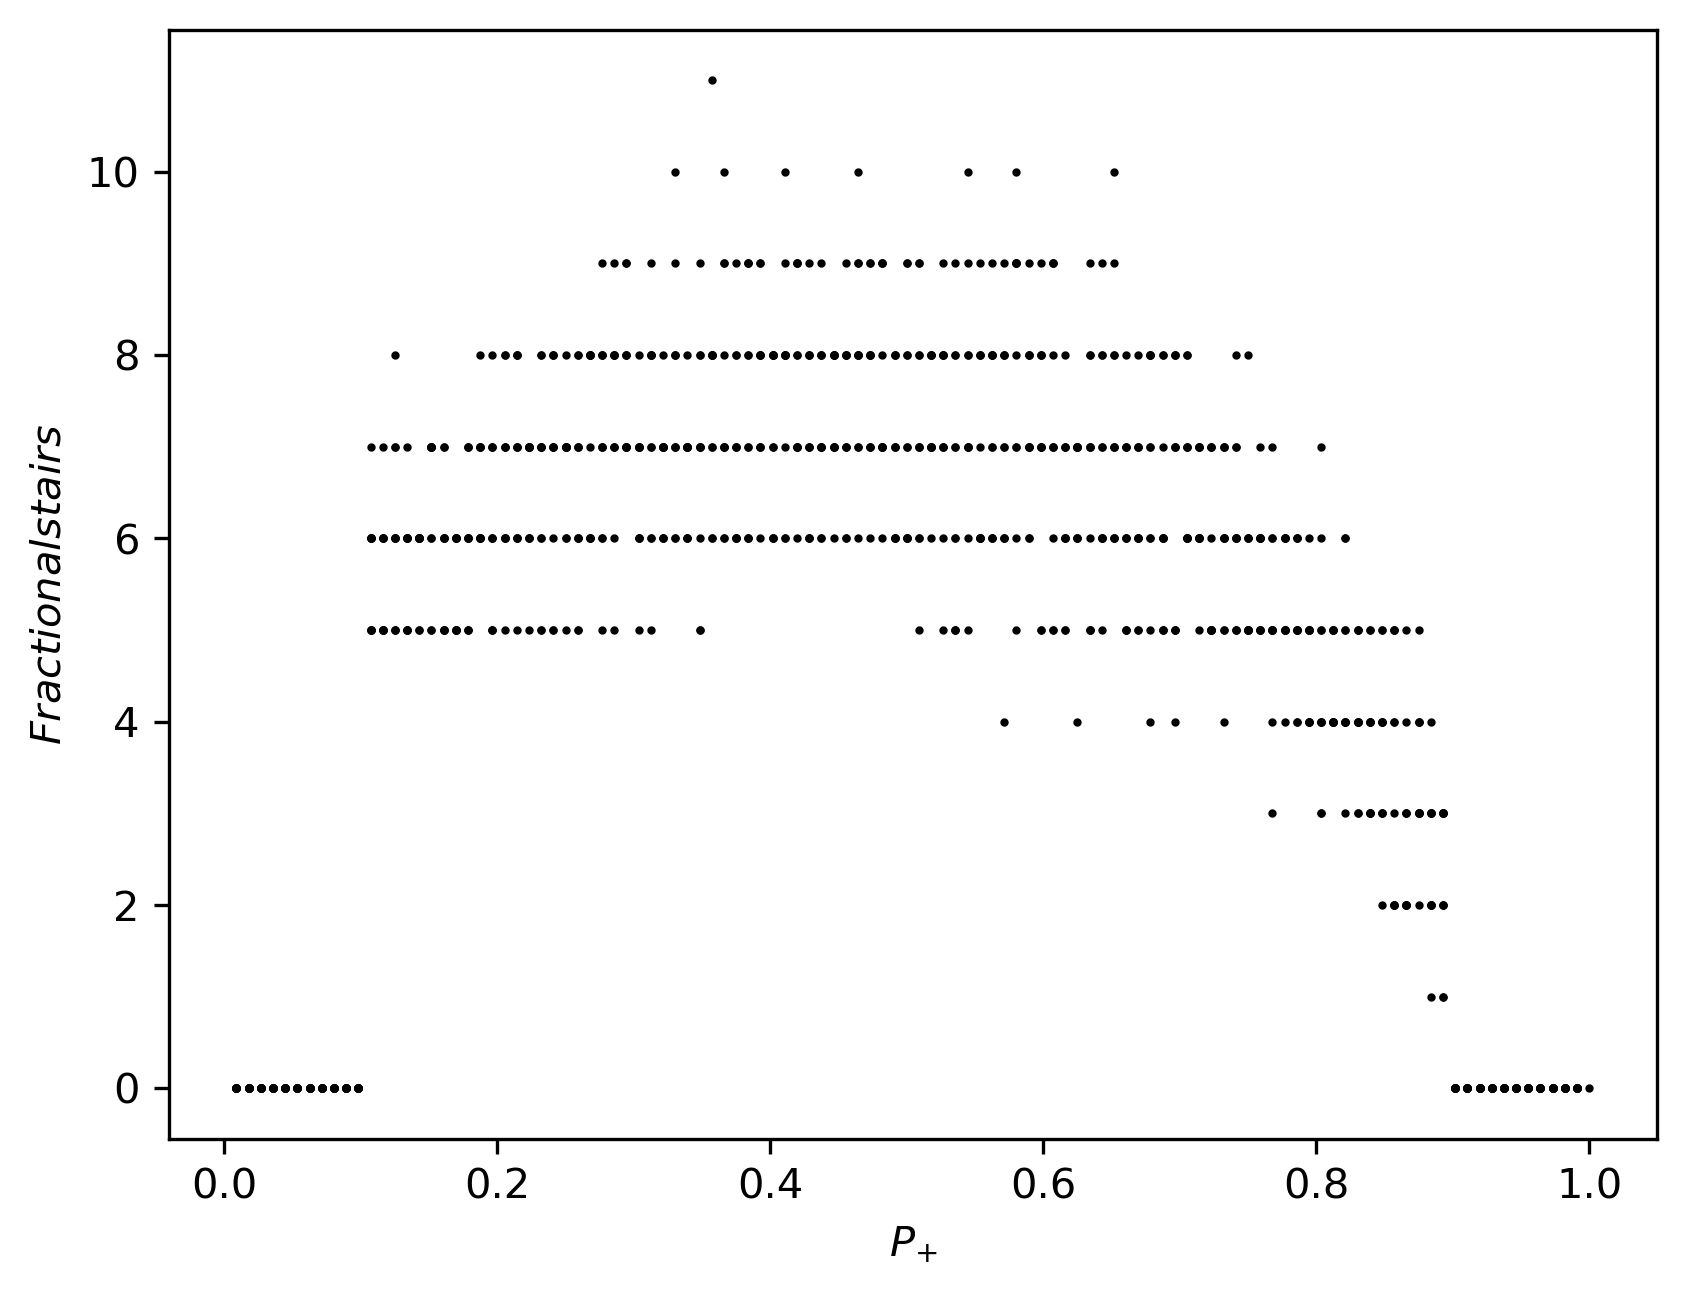

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(dpi=300)
idxs = [i for i, x in enumerate(P_plus) if x > P_plus_sample]
for indx in idxs:
    file = arr_of_files[indx]
    gem = numpy.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    M_before = - N * N
    stair = 0
    start = False
    for h in range(len(H)):
        Energy = E - M * H[h]
        Egs_idx = numpy.argwhere(Energy <= numpy.min(Energy) * 0.9999)
        Mgs = numpy.min(M[Egs_idx]) / (N * N)
        if Mgs != M_before:
            start = True
        if start and Mgs == M_before and abs(P_plus[indx] - round(P_plus[indx])) > 0.1:
            stair += 1
            start = False
        M_before = Mgs
    plt.scatter(P_plus[indx], stair, color='black', s=1)
plt.xlabel("$P_{+}$")
plt.ylabel("$Fractional stairs$")
plt.show()
plt.savefig("../../Fractional_stairs.eps", dpi=300)